# 모형 정확성 평가
--------------

## 훈련 데이터와 테스트 데이터

모형의 올바른 평가는 훈련 데이터와 테스트 데이터를 나누는 것으로부터 시작한다.

주어진 데이터의 대략 80% 정도는 훈련 데이터로, 나머지는 테스트 데이터로 사용한다.

* 훈련 데이터 : 기계 학습 모델을 훈련하는 데 사용되는 초기 데이터
* 테스트 데이터 : 모델의 정확도를 평가하는데 사용됨


훈련 데이터 (training data) $\mathrm{Tr} = \{x_i, y_i\}_1^N $에 대한 어떤 모형 적합을 $\hat f(x)$라고 하자.

$Y$ 값이 실수인 경우 이를 회귀 (regression) 문제라고 한다.

회귀 문제에 대해 mean sqaured prediction error (MSE)를 계산하여 모형의 정확성을 평가한다고 하자.

$$ \mathrm{MSE}_{\mathrm{Tr}} = \mathrm{Ave}_{i \in \mathrm{Tr}} ( y_i  - \hat f(x_i))^2 $$

즉, $\mathrm{MSE}_{\mathrm{Tr}}$를 최소화하는 적합을 $\hat f$라 하면, 이는 overfit을 할 가능성이 높다.

이보다는 테스트 데이터 $\mathrm{Te} = \{x_i, y_i\}_1^M $를 따로 선정하여 다음을 최소화하는 적합을 찾아야 한다.

$$ \mathrm{MSE}_{\mathrm{Te}} = \mathrm{Ave}_{i \in \mathrm{Te}} ( y_i  - \hat f(x_i))^2 $$

모델이 이미 훈련 데이터를 알고 있기 때문에 모델을 검증하려면 새 데이터 세트가 필요하다.

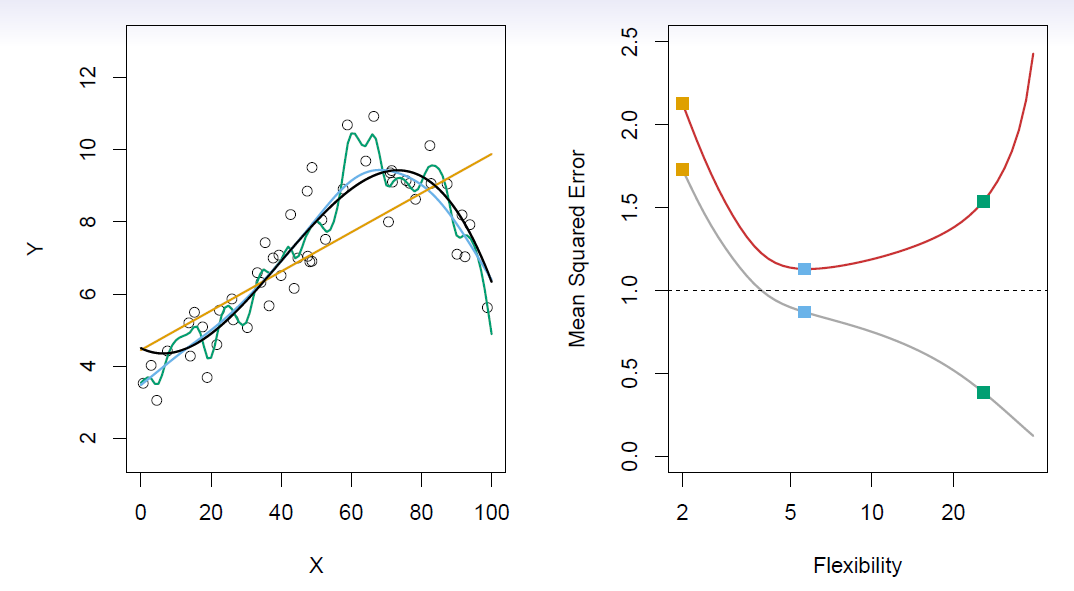

위 그림의 좌측에서 검은 선이 실제 $f$이다.

점들은 $f$에 오차가 포함된 관찰값, 즉, 실제 $Y$값들이다.

오렌지색, 파란색, 초록색 선들은 서로 다른 flexibility를 가지는 모형에 대한 적합 결과이다.

오른쪽 그림의 빨간선은 모형의 flexibility에 따른 $\mathrm{MSE}_{\mathrm{Te}}$이고 회색선은 $\mathrm{MSE}_{\mathrm{Tr}}$에 대한 것이다.

오른쪽 그림에서 파란색 네모가 가장 작은 $\mathrm{MSE}_{\mathrm{Te}}$를 가지며 가장 잘 적합된 모형을 의미한다.

$\mathrm{MSE}_{\mathrm{Tr}}$는 결국 모형이 복잡할수록 작은 값을 가지는 경향이 있으며, $\mathrm{MSE}_{\mathrm{Tr}}$가 모형 평가에 이용되기 힘든 면을 보여준다.

주확색 선형 모형은 underfitting을 초록색 복잡한 모형은 overfitting의 결과를 나타낸다.

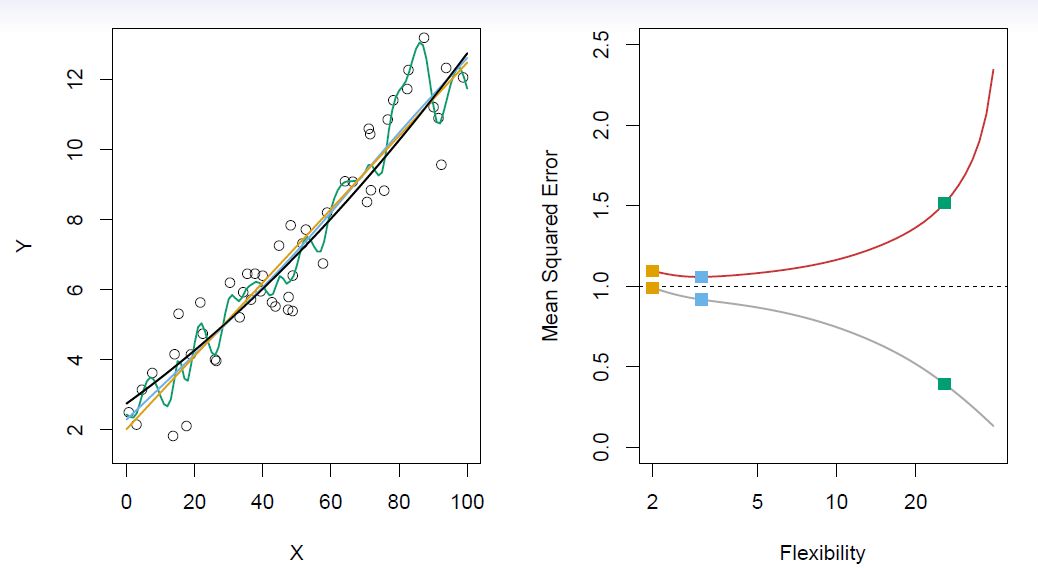

위 그림의 두 번째 예제는 $f$의 참값이 직선에 가까운 경우이다.

따라서, 선형 모형의 적합인 오렌지색 또한 매우 작은 $\mathrm{MSE}_{\mathrm{Te}}$를 가진다.

초록색은 전형적인 overfitting의 모양을 보이며, 비록 작은 $\mathrm{MSE}_{\mathrm{Tr}}$를 가지더라도 높은 $\mathrm{MSE}_{\mathrm{Te}}$를 가져 적합에 사용되었던 훈련 데이터가 아닌 새로운 테스트 데이터에는 안 좋은 성능을 보임을 알 수 있다.

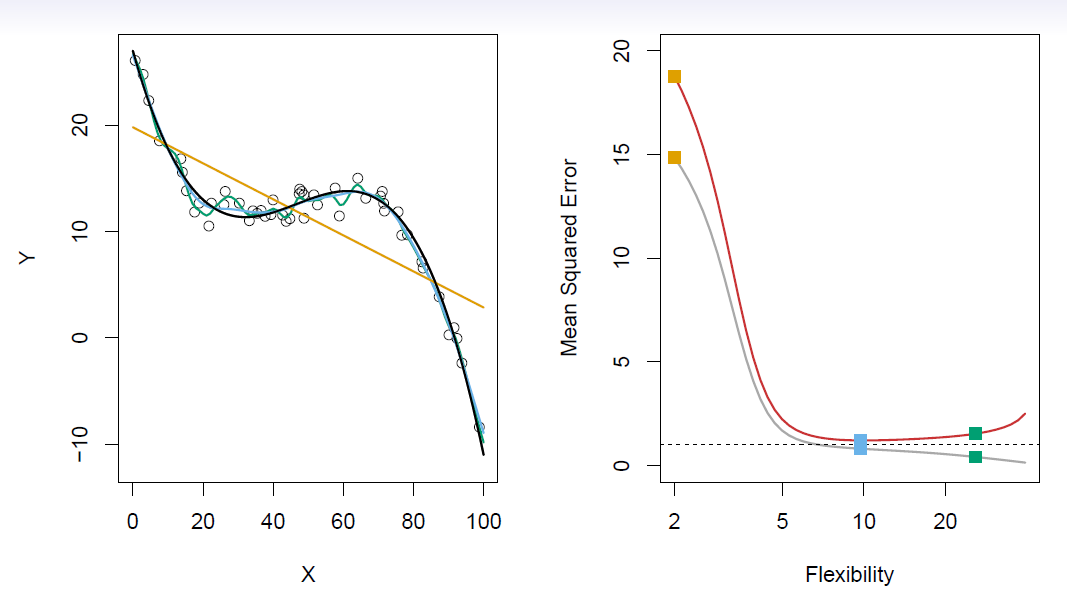

마지막으로 true $f$ 자체가 복잡한 함수의 예제이다.

이 경우는 바로 전 예제와는 달리 선형 모형이 가장 큰 $\mathrm{MSE}_{\mathrm{Te}}$를 가지며 가장 안 좋은 성능을 보임을 알 수 있다.

## Bias-Variance Trade-off

Fit model : $\hat f(x)$  with training data $\mathrm{Tr}$

True model : $Y = f(X) + \epsilon$

테스트 관찰값 $(x_0, y_0)$에 대해 다음의 식이 성립한다.

$$ \mathbb E \left( y_0 -  \hat f (x_0) \right)^2 = \mathrm{Var}(\hat f (x_0)) + [\mathrm{Bias}(\hat f(x_0))]^2 + \textrm{Var}(\epsilon)$$

* 여기서 $\textrm{Var}(\hat f(x_0))$는 훈련 데이터 $\mathrm{Tr}$가 바뀌었을 때 변화하는 $\hat f$의 변동이다. $\hat f$는 훈련 데이터에 의해 결정되며 훈련 데이터가 바뀐다면 $\hat f$도 변한다.

* $\mathrm{Bias}(\hat f(x_0)) = \mathbb E[\hat f(x_0)] - f(x_0)$로서 적합된 모형이 실제 모형과 다른 정도를 나타낸다.

### Trade-off

$[\mathrm{Bias}(\hat f(x_0))]^2$와 $\mathrm{Var}(\hat f (x_0))$의 관계를 Bias-Variance trade-off라고 한다.

* 모형의 flexibility가 높아지면 $\mathrm{Var}(\hat f (x_0))$가 증가한다.
  
  * 높은 복잡도의 모형에서는 훈련 데이터가 바뀌면 $\hat f$도 크게 바뀔 것이다.
    
  * 반면, 모형의 복잡도가 높으면 $\mathbb E[\hat f] \approx f$가 되며, $[\mathrm{Bias}(\hat f(x_0))]^2$는 감소한다.

  
* 모형의 flexibility가 낮아지면 $[\mathrm{Bias}(\hat f(x_0))]^2$가 증가한다.
  
  * 모형이 간단하면 $\mathbb E[\hat f]$가 $f$와 충분히 가깝지 않을 가능성이 높다.이에 bias가 증가한다.
    
  * 반면, 훈련 데이터가 바뀌어도 $\hat f$가 크게 바뀌진 않을 것이다.

전체 변동 $\mathbb E \left( y_0 -  \hat f (x_0) \right)^2$을 줄이려면, bias와 variance가 동시에 낮아지는 지점을 찾아야 한다.

이는 통상적으로 테스트 에러를 가장 최소화하는 flexibility를 가지는 모형을 선택함으로서 이루어진다.

과적합(overfitting) 모형에서는 $\textrm{Var}(\hat f(x_0))$가 높고, 과소적합(underfitting)된 모형에서는 $[\mathrm{Bias}(\hat f(x_0))]^2$가 높다.

아래 그림은 위 예제들의 bias-variance 관계를 보여준다.

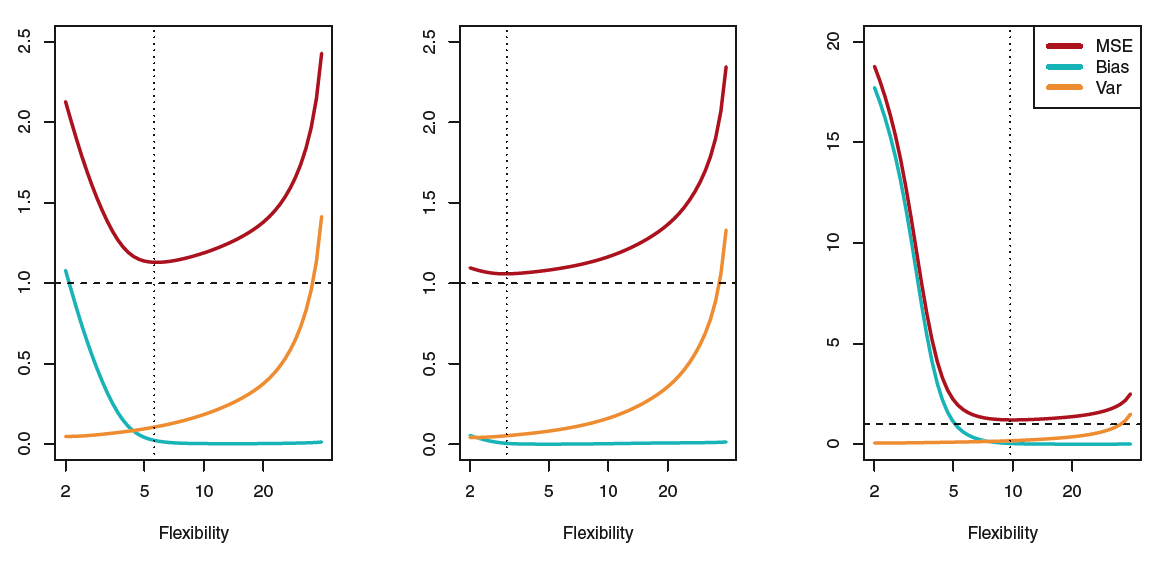

## 분류 (Classification) 문제

지금까지는 regression 문제들에 대해 생각해 보았다. 이제 분류 문제를 생각해 보자.

예를 들어, 이메일은 $\mathcal C = (\mathrm{spam}, \mathrm{ham})$ 중의 하나로 구분할 수 있다.

이처럼 반응변수 $Y$가 질적 변수일 때, 우리는 다음의 일들을 할 수 있다.

* 분류기 (classifier) $C (X)$를 만들어 미래에 관찰되는 관찰값 $X$를 $\mathcal C$ 중의 하나로 분류한다.

* 분류 작업에 있어 불확실성을 평가한다.

* 예측 변수인 $X=(X_1, \cdots, X_p)$의 역할을 연구한다.

이상적인 $C(X)$는 무엇일까?

$\mathcal C$에 $K$개의 원소가 있고, 이를 $1,2,\cdots, K$라고 하자. 그리고

$$ p_k(x) = \mathbb P (Y=k | X=x), \quad k=1, \cdots, K$$

라고 하면, 이를 $x$에서의 conditional class probability라고 할 수 있다.

그러면 $x$에서의 Bayes optimal classifier (새로운 데이터에 대해 가장 가능성 높은 예측을 하는 확률 모델)는 다음과 같이 정의된다.

$$ C(x) = j \textrm{ if } p_j(x) = \max \{p_1(x), p_2(x), \cdots, p_K(x) \} $$


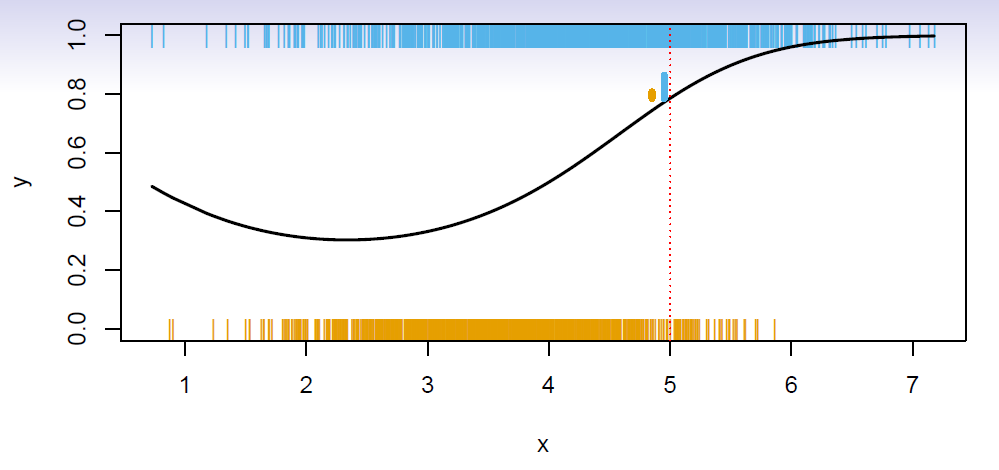

위 그림에서 $Y=0$ 혹은 $Y=1$의 값을 가지는 분류 문제이다.

* 아래쪽 라인에 붙어있는 노란색 점들은 $Y=0$일 때 $X$의 true 분포를 나타낸다.

* 위쪽 라인에 붙어있는 파란색 점들은 $Y=1$일 때 $X$의 true 분포를 나타낸다.

* 검은 곡선은 $p_1(X)$이다. 

예를 들어, 위 그림에서 $x=5$일 때, $Y=0$일 조건부 확률 $p_0(5)$는 검은 색 곡선에 붙어있는 노란색 막대 (bar)로, $Y=1$일 조건부 확률 $p_1(5)$는 파란색 막대로 나타나 있다.

따라서, Bayes optimal classifier에 따르면, $C(5) = 1$이다.

그러면, $C$는 어떻게 추정하는가? 

아래 그림에서 아래쪽과 위쪽의 노란색 혹은 파란색 점들은 데이터에서의 $X$의 분포를 나타낸다.

예전에 언급했던 nearest-neighbor averaging 방법을 사용해 볼 수 있겠다. 

아래의 그림에서 빨간 점선이 가상의 neighborhood를 나타낸다.

그리고 초록색 선은 neighborhood의 데이터를 이용하여 추정한 확률로 계산한 추정치이다.

예를 들어, $\hat C(5)$는 $x=5$의 근방에서 $Y=0$인 케이스가 3개, $Y=1$인 케이스가 7개 발견되었다고 하면,

$\hat p_0(5) = 0.3, \enspace  \hat p_1(5) = 0.7$이고, $\hat C(5) = 1$이다.

초록색 선은 $\hat p_1(x)$이다. 

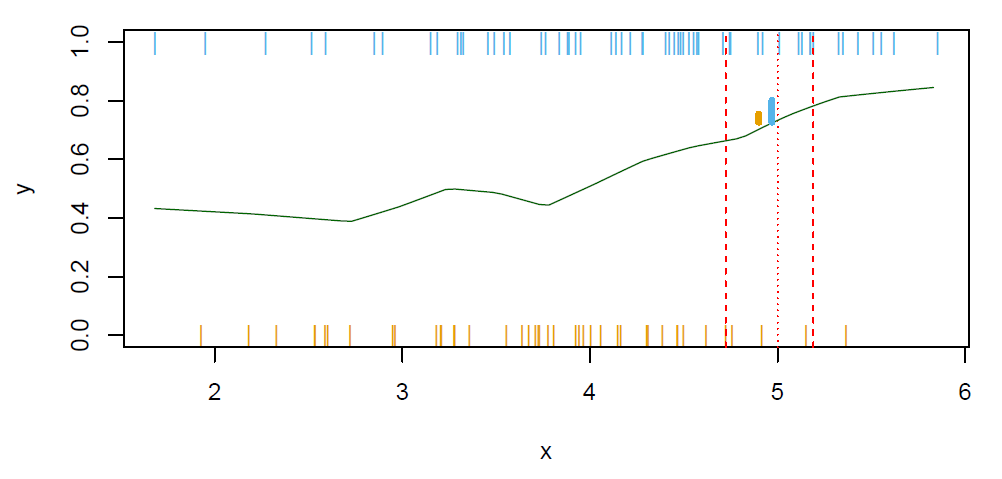

이전과 마찬가지로 차원이 증가하면, 이 방법은 어려워진다. 

다만, 차원증가에 따른 추정의 어려움은 $\hat p_k(x)$에서 보다는 $\hat C(x)$에서 더 적다고 한다.

$\hat C(x)$의 성능 측정은 테스트 데이터에 대해 다음의 에러 비율로 측정한다.

$$ \mathrm{Err}_{\mathrm{Te}} = \mathrm{Ave}_{i \in \mathrm{Te}} I [y_i \neq \hat C (x_i)] $$

여기서 $I$는 characteristic function으로 $y_i \neq \hat C (x_i)$일 경우 1의 값을, 그 외에는 0의 값을 가진다.

- 즉, 추정된 분류기 $\hat C(x)$에 의한 분류가 잘못된 경우의 비율을 계산한다.

앞에서 언급한, $p_k(x)$의 참값을 이용한 Bayes classifier가 가장 작은 에러를 가진다. 물론 현실에서는 true $p_k(x)$를 알긴 힘들다.

앞으로 공부할 support vector machine은 $C(x)$를 어떻게 추정할지 연구한다.

Logistic regression이나 generalized additive 모형에서는 $p_k(x)$를 어떻게 추정할지 연구한다.

### 예제 : K-nearest neighbors

앞서 설명했듯이, $p_k(x)$는 알지 못하기 때문에 현실에서 Bayes classifier를 이용하기는 힘들다.

대신 $p_k(x)$의 추정치인 $\hat p_k(x)$를 이용하여 분류하는 경우가 많다.

그 중의 한 예는 K-nearest neighbors (KNN) 방법이다.

KNN에서는 테스트 데이터 $x_0$의 근처에 있는 $K$개의 훈련 데이터 관찰값들을 $x_0$의 neighbor인 $\mathcal N_0$로 정한다.

그리고, 클래스  $j$에 대한 조건부 확률을 $\mathcal N_0$ 중 반응변수의 값이 $j$에 속하는 비율로 추정한다. 즉,

$$ \hat p_k(x_0) =  \frac{1}{K} \sum_{i \in \mathcal N_0} I (y_i = j) $$

추정된 조건부 확률을 비교하여 가장 큰 값을 가지는 조건부 확률 해당하는 클래스가 새로운 테스트 관찰값 $x_0$의 클래스로 추정된다.

KNN은 자연수 $K$의 값을 무엇으로 하는가에 따라 분류 결과가 달라진다.

$K$가 작을수록 overfitting이 되고 $K$가 클수록 underfitting이 된다. 아래의 그림들을 보며 비교하자. 

보라색 점선이 Bayes optimal classifier에 의한 실제 경계선이다.

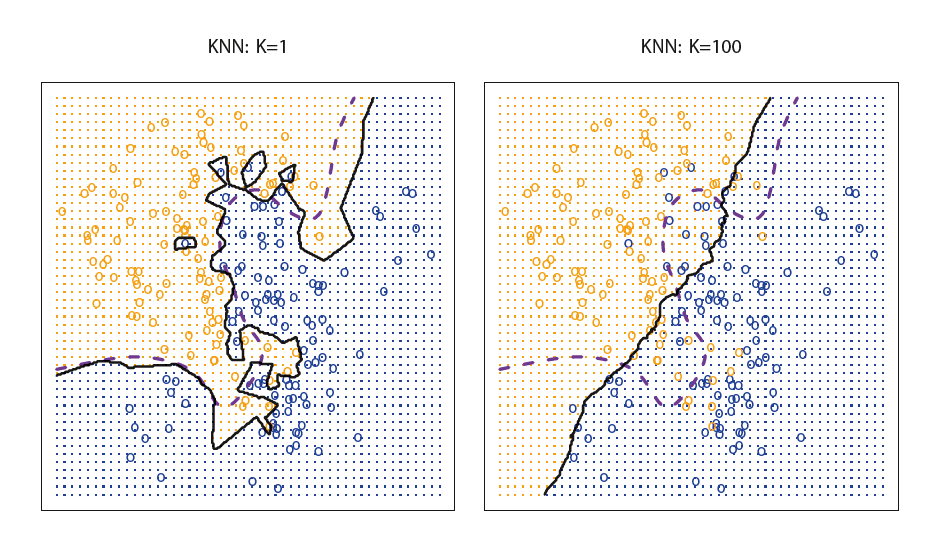

가장 좋은 분류기의 $K$는 1과 100의 중간 어디에 위치할 것이다. 

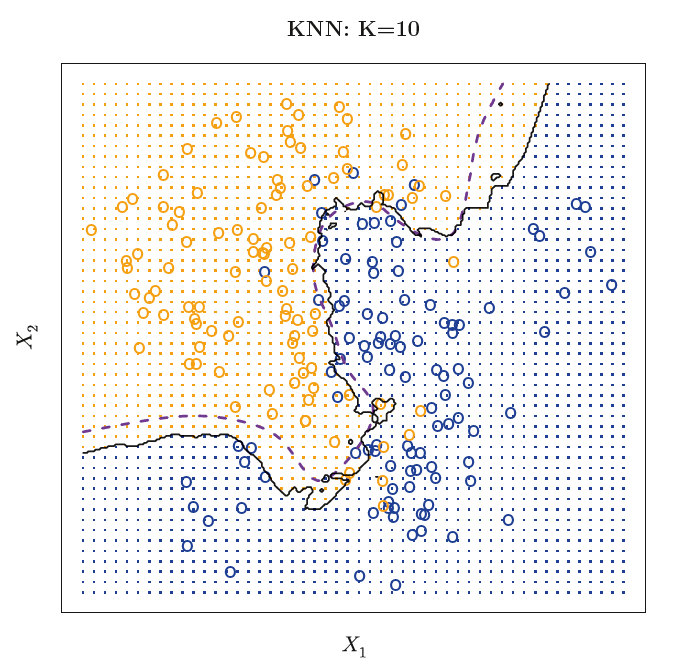

다음 그림은 training error와 test error를 $1/K$의 그래프로 표현하였다.

모형의 flexibility ($1/K$)가 증가할수록 training error의 크기는 점점 작아진다.

반면, test error는 $1/K = 0.1$ 근방에서 최저가 되었다가 다시 증가한다.

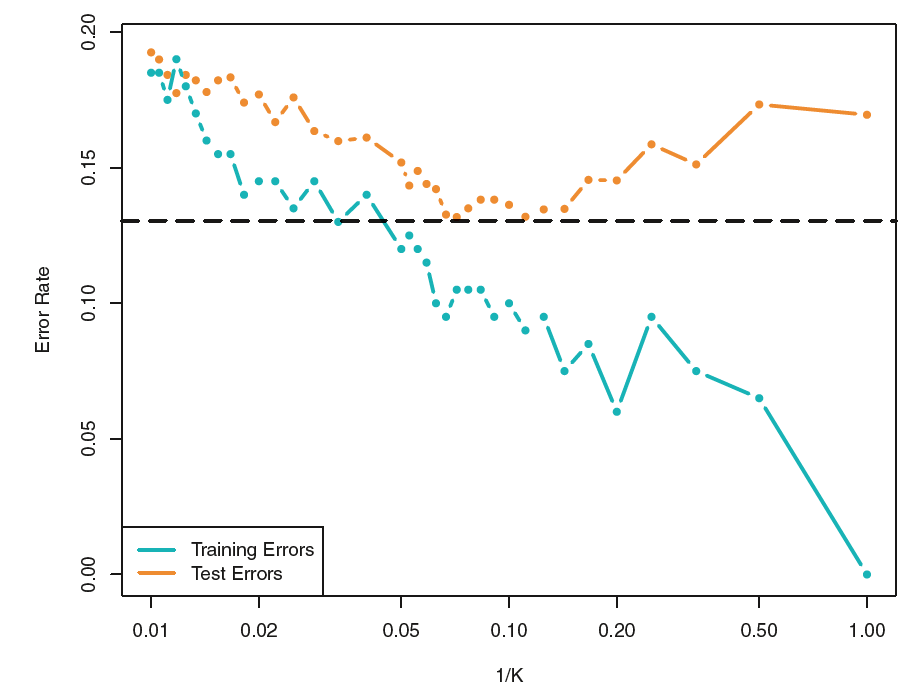

## Confusion matrix

먼저 이진 분류(binary classification) 문제를 전제로 하며, 두 가지 클래스(Positive / Negative) 간 구분에 초점을 맞추어 살펴 보자.

- Positive / Negative는 의료 진단 예시에서 유래한 용어

(다중 클래스(multi-class) 분류 문제에서는 각 클래스마다 아래에서 나오는 지표들과 유사한 값들을 one-vs-rest 방식으로 정의하여 계산)

|            |          | True  status   |                |
|------------|----------|----------------|----------------|
|            |          | Positive (non-null)       | Negative (null)      |
| Prediction | Positive (non-null) | True Positive  | False Positive |
|            | Negative (null) | False Negative | True Negative  |
|            |          |                |                |


### Types of errors

* False positive rate : 실제 negative 중 positive로 잘못 예상된 False positive에 해당하는 비율, FP/N
    * 통계학에서의 1종 오류율, $\alpha$, 귀무가설(null)이 사실이어도 기각될 확률
    * 1 - specificity <br><br>
    
* False negative rate : 실제 positive 중 negative로 잘못 예상된 False negative에 해당하는 비율, FN/P
    * 통계학에서의 2종 오류율, $\beta$,  귀무가설(null)이 거짓이어도 기각하지 못할 확률
    * 1 - sensitivity <br><br>


### 주요 성능 지표들

* 민감도, Sensitivity, **재현율, Recall** (True positive rate), Power : 실제 postive 중 올바르게 positive로 예측된 비율, TP/P
  * 1 - FNR 
  * 기계학습에서는 예측하고자 하는 클래스를 얼마나 잘 찾아냈는지를 나타내는 비율 
  * 실제 스팸 이메일 100개 중 90개를 모델이 스팸으로 맞췄다면 → 민감도 90% <br><br>
  
* 특이도, Specificity (True negative rate) : 실제 negative 중 올바르게 negative로 예측된 비율, TN/N
  * 1 - FPR <br><br>
  
* **정밀도, Precision** (Positive predictive rate) : 양성 예측 중 실제 양성의 비율, TP / P*
  * 기계학습에서는 모델이 예측한 클래스 중 올바르게 예측한 비율 
  * 모델이 스팸이라고 예측한 50개의 메일 중 45개가 진짜 스팸이었다면 → 정밀도 90% <br><br>

* Negative predictive rate : 음성 예측 중 실제 음성의 비율, TN / N*

* **정확도, Accuracy** : 전체 데이터 중 정답으로 분류되는 비율

* **에러율, Error rate** : 전체 데이터 중 오답으로 분류되는 비율

### Precision–Recall Trade-off

정밀도 (precision)와 민감도 (sensitivity)은 트레이드오프를 지닌다. 

정밀도를 올리면 민감도 (재현율)이 줄고, 민감도를 높이면 정밀도가 낮아지는 경향이 있다.

양성으로 판정되는 기준을 높이면 정밀도가 올라가나, 민감도 (재현율)은 떨어진다.

양성으로 판정되는 기준을 낮추면 재현율은 올라가나, 정밀도는 떨어진다.

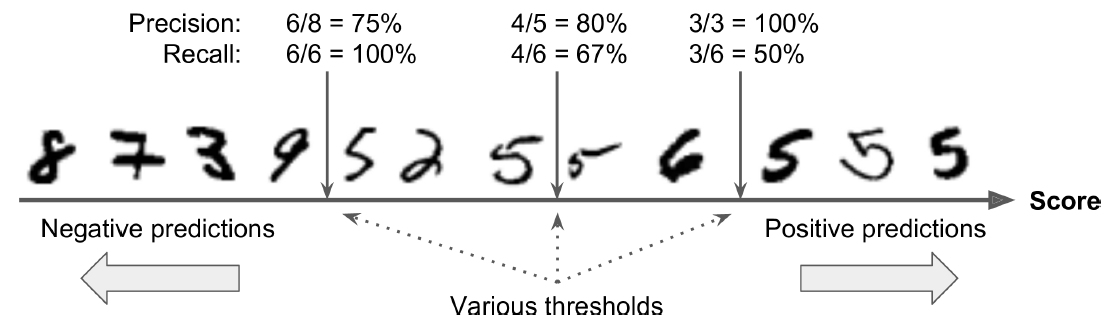